Iwo Szczepaniak

### Zad 1 i 2
Zaimplementuj w Pythonie algorytmy wyszukiwania wzorców:
naiwny
automat skończony
algorytm KMP
Zaimplementuj testy porównujące szybkość działania wyżej wymienionych algorytmów, z rozbiciem na czasu pre-processingu oraz czas wyszukiwania wzorca w tekście (1p).

In [27]:
from time import perf_counter as timer

### NAIVE ALGORITHM

In [28]:
def naive(text, key):
    start = timer()
    res = []
    n = len(text)
    m = len(key)
    for i in range(n-m+1):
        if text[i:i+m] == key: res.append(i)
    end = timer()
    return res, 0, end - start

### FINATE AUTOMATON

In [29]:
def transition_table(pattern):
    alphabet = set(pattern)
    n = len(pattern)
    result = []
    for q in range(n+1):
        result.append({})
        for l in alphabet:
            k = min(n, q+1)
            while True:
                if k == 0 or pattern[:k] == (pattern[:q] + l)[-k:]:
                    break
                k -= 1
            result[q][l] = k
    return result


def finite_automaton(text, pattern):
    q = 0
    pre_start = timer()
    trasn_table = transition_table(pattern)
    pre_end = start = timer()
    text_len = len(text)
    result = []
    for s in range(text_len):
        if text[s] in trasn_table[q]:
            q = trasn_table[q][text[s]]
            if q == len(trasn_table) - 1:
                result.append(s+1-q)
        else:
            q = 0
    end = timer()
    return result, pre_end-pre_start, end - start


### KMP

In [30]:
def kmp(text, pattern):
    n = len(text)
    m = len(pattern)
    pre_start = timer()
    lps = compute_lps(pattern)
    pre_end = start= timer()
    i = 0
    j = 0
    indices = []
    while i < n:
        if text[i] == pattern[j]:
            i += 1
            j += 1
        if j == m:
            indices.append(i - j)
            j = lps[j - 1]
        elif i < n and text[i] != pattern[j]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    end = timer()
    return indices, pre_end-pre_start, end - start

def compute_lps(pattern):
    m = len(pattern)
    lps = [0] * m
    i = 1
    j = 0
    while i < m:
        if pattern[i] == pattern[j]:
            j += 1
            lps[i] = j
            i += 1
        elif j != 0:
            j = lps[j - 1]
        else:
            lps[i] = 0
            i += 1
    return lps

In [31]:
def compare(text, key):
    result_naive, pretime_naive, time_naive = naive(text, key)
    result_fa, pretime_fa,time_fa = finite_automaton(text, key)
    result_kmp, pretime_kmp, time_kmp = kmp(text, key)

    print(f"For the key: {key}")
    print(f"NAIVE ALGORITHM -   in time {time_naive:.6f}s (preprocessing {pretime_naive:.6f}s))") #; starting on indexes: {result_naive} ")
    print(f"FINITE AUTOMATON -  in time {time_fa:.6f}s (preprocessing {pretime_fa:.6f}s)") #; starting on indexes: {result_fa} ")
    print(f"KMP -               in time {time_kmp:.6f}s (preprocessing {pretime_kmp:.6f}s)") #; starting on indexes: {result_kmp} ")
    if result_naive == result_fa == result_kmp:
        print(f"\nALL ALGORITHMS RETURN THE SAME RESULTS - {len(result_naive)} keys in text")
    print("-" * 500)

### Zad 3
Znajdź wszystkie wystąpienia wzorców "pan" oraz "pani" w załączonym pliku, za pomocą każdego algorytmu. W raporcie zamieść liczbę dopasowań każdego ze wzorców osobno dla każdego algorytmu. Upewnij się, że każdy algorytm zwraca taką samą liczbę dopasowań (1p).


In [32]:
with open('pan-tadeusz.txt', 'r') as file:
    pan_tadeusz = file.read()

compare(pan_tadeusz, "pan")
compare(pan_tadeusz, "pani")

For the key: pan
NAIVE ALGORITHM -   in time 0.059652s (preprocessing 0.000000s))
FINITE AUTOMATON -  in time 0.039528s (preprocessing 0.000032s)
KMP -               in time 0.086522s (preprocessing 0.000005s)

ALL ALGORITHMS RETURN THE SAME RESULTS - 401 keys in text
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
For the key: pani
NAIVE ALGORITHM -   in time 0.061375s (preprocessing 0.000000s))
FINITE AUTOMATON -  in time 0.043058s (preprocessing 0.000040s)
KMP -               in time 0.088908s (preprocessing 0.000006s)

ALL ALGORITHMS RET

### Zad4
Porównaj szybkość działania algorytmów dla problemu z p. 3, z uwzględnieniem czasu pre-processingu oraz czasu dopasowania. Pomiar czasu powinien być przeprowadzony co najmniej 5-krotnie i przedstawione w formie tabeli oraz wykresu, uwzględniającego czas minimalny, maksymalny oraz średni czas (1p).


In [33]:
import pandas as pd
import matplotlib.pyplot as plt


def compare_with_stats(text, key, times):
    naive_times = []
    fa_times = []
    kmp_times = []

    for i in range(times):
        naive_result, naive_pretime, naive_time = naive(text, key)
        naive_times.append(naive_time)

        fa_result, fa_pretime, fa_time = finite_automaton(text, key)
        fa_times.append(fa_time)

        kmp_result, kmp_pretime, kmp_time = kmp(text, key)
        kmp_times.append(kmp_time)

    data = {'TIME': ['NAIVE', 'FA', 'KMP'],
            'Avg(s)': [sum(naive_times) / times, sum(fa_times) / times, sum(kmp_times) / times],
            'Min(s)': [min(naive_times), min(fa_times), min(kmp_times)],
            'Max(s)': [max(naive_times), max(fa_times), max(kmp_times)],
            'Preproc.(s)': [naive_pretime, fa_pretime, kmp_pretime],
            'Nr of keys': [int(len(naive_result)), str(len(fa_result)), str(len(kmp_result))]}
    plt.bar(['Naive', 'FA', 'KMP'], [sum(naive_times) / times,
            sum(fa_times) / times, sum(kmp_times) / times])
    plt.title('Average Time Taken by Each Algorithm')
    plt.xlabel('Algorithm')
    plt.ylabel('Time (s)')
    plt.show()

    df = pd.DataFrame(data)
    df = df.set_index('TIME').transpose()
    print(df)
    print("-" * 500)


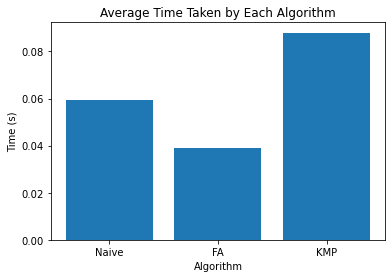

TIME            NAIVE        FA       KMP
Avg(s)       0.059194  0.039103  0.087961
Min(s)        0.05883  0.037934  0.086085
Max(s)       0.059712  0.040316  0.090163
Preproc.(s)       0.0  0.000026  0.000005
Nr of keys        401       401       401
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


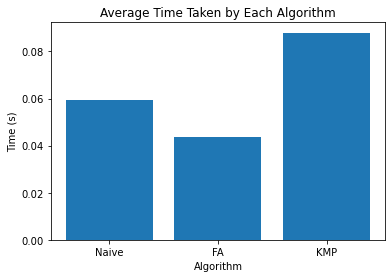

TIME            NAIVE        FA       KMP
Avg(s)       0.059415  0.043645  0.087977
Min(s)       0.058725  0.042561  0.087035
Max(s)       0.061251  0.046311   0.08923
Preproc.(s)       0.0   0.00004  0.000004
Nr of keys        100       100       100
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [34]:
with open('pan-tadeusz.txt', 'r') as file:
    pan_tadeusz = file.read()

times = 10
compare_with_stats(pan_tadeusz, "pan", times)
compare_with_stats(pan_tadeusz, "pani", times)

### Zad 5
Zaproponuj tekst oraz wzorzec, dla którego zmierzony czas działania algorytmów 2 oraz 3 (uwzględniający tylko dopasowanie, bez pre-processingu) będzie co najmniej 5-krotnie krótszy niż dla algorytmu naiwnego. Uruchom każdy algorytm na zadanym wzorcu i tekście, w celu sprawdzenia, czy zmierzony czas jest faktycznie co najmniej 5-krotnie krótszy (1p).


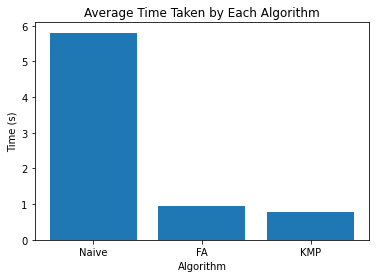

TIME            NAIVE        FA       KMP
Avg(s)       5.806185  0.951475  0.769671
Min(s)       5.688456  0.921801  0.757464
Max(s)       6.040163  0.979447  0.802141
Preproc.(s)       0.0  0.183418  0.004386
Nr of keys    2970001   2970001   2970001
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [37]:
key = "x"*30000
text = key * 100

times = 5

compare_with_stats(text, key, times)

### Zad6
Przedstaw wnioski wynikające z przeprowadzonych eksperymentów, ze szczególnym uwzględnieniem praktycznych konsekwencji wynikających z różnic pomiędzy zaimplementowanymi algorytmami (1p).

Osiągnięcie 5 krotnej różnicy wymagało użycia dość skrajnego przypadku - tzn bardzo długiego klucza. W zastosowaniach praktycznych algorytm naiwny zdaje się spełniać wymagania szybkościowe w sposób wystarczający - a nawet często działa szybciej niż algorytmy 2 i 3.